In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers

In [4]:
df = pd.read_csv(r'c:\Users\User\Desktop\eu\DeepLearning\complete_renewable_energy_dataset.csv')
df.columns = df.columns.str.replace(' ', '_')  # Remover espaços dos nomes das colunas
df.head()

,Country,Year,Energy_Type,Production_(GWh),Installed_Capacity_(MW),Investments_(USD),Population,GDP,Energy_Consumption,Energy_Exports,...,Economic_Freedom_Index,Ease_of_Doing_Business,Innovation_Index,Number_of_Research_Institutions,Number_of_Renewable_Energy_Conferences,Number_of_Renewable_Energy_Publications,Energy_Sector_Workforce,Proportion_of_Energy_from_Renewables,Public-Private_Partnerships_in_Energy,Regional_Renewable_Energy_Cooperation
0,USA,2011,Solar,85404.690027,5549.794323,5.604125e+09,1064007213,1.775278e+14,369654.644184,93087.198199,...,49.216800,57.678605,76.803228,851,75,6361,511658,25.907895,1,0
1,Australia,2008,Geothermal,22205.069382,43211.593798,6.361886e+08,1033255852,6.435372e+13,771781.636293,1752.536054,...,79.990942,1.761579,48.697825,590,39,9752,974948,95.003547,0,1
2,Canada,2013,Biomass,94102.732038,6139.117212,6.158680e+09,14895124,1.567926e+14,342707.152899,65146.592498,...,94.374040,77.657334,67.334813,101,7,311,326318,67.354539,1,0
3,Japan,2010,Biomass,88771.932910,40323.639260,8.526116e+09,1448827283,1.350464e+14,498839.574253,50257.591014,...,65.143472,44.987734,4.544289,327,3,7708,506078,33.754104,0,0
4,China,2018,Solar,93288.408581,30755.403056,5.086237e+09,1499494307,8.677956e+13,819064.362785,63101.395562,...,86.213626,62.535223,10.287199,985,69,4919,187964,59.509228,1,0


In [5]:
# Checar valores nulos e informações gerais dos dados
df.isnull().sum()

Country                                    0
Year                                       0
Energy_Type                                0
Production_(GWh)                           0
Installed_Capacity_(MW)                    0
Investments_(USD)                          0
Population                                 0
GDP                                        0
Energy_Consumption                         0
Energy_Exports                             0
Energy_Imports                             0
CO2_Emissions                              0
Renewable_Energy_Jobs                      0
Government_Policies                        0
R&D_Expenditure                            0
Renewable_Energy_Targets                   0
Average_Annual_Temperature                 0
Annual_Rainfall                            0
Solar_Irradiance                           0
Wind_Speed                                 0
Hydro_Potential                            0
Geothermal_Potential                       0
Biomass_Av

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 56 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Country                                  2500 non-null   object 
 1   Year                                     2500 non-null   int64  
 2   Energy_Type                              2500 non-null   object 
 3   Production_(GWh)                         2500 non-null   float64
 4   Installed_Capacity_(MW)                  2500 non-null   float64
 5   Investments_(USD)                        2500 non-null   float64
 6   Population                               2500 non-null   int64  
 7   GDP                                      2500 non-null   float64
 8   Energy_Consumption                       2500 non-null   float64
 9   Energy_Exports                           2500 non-null   float64
 10  Energy_Imports                           2500 no

## Plotar histogramas para as colunas numéricas

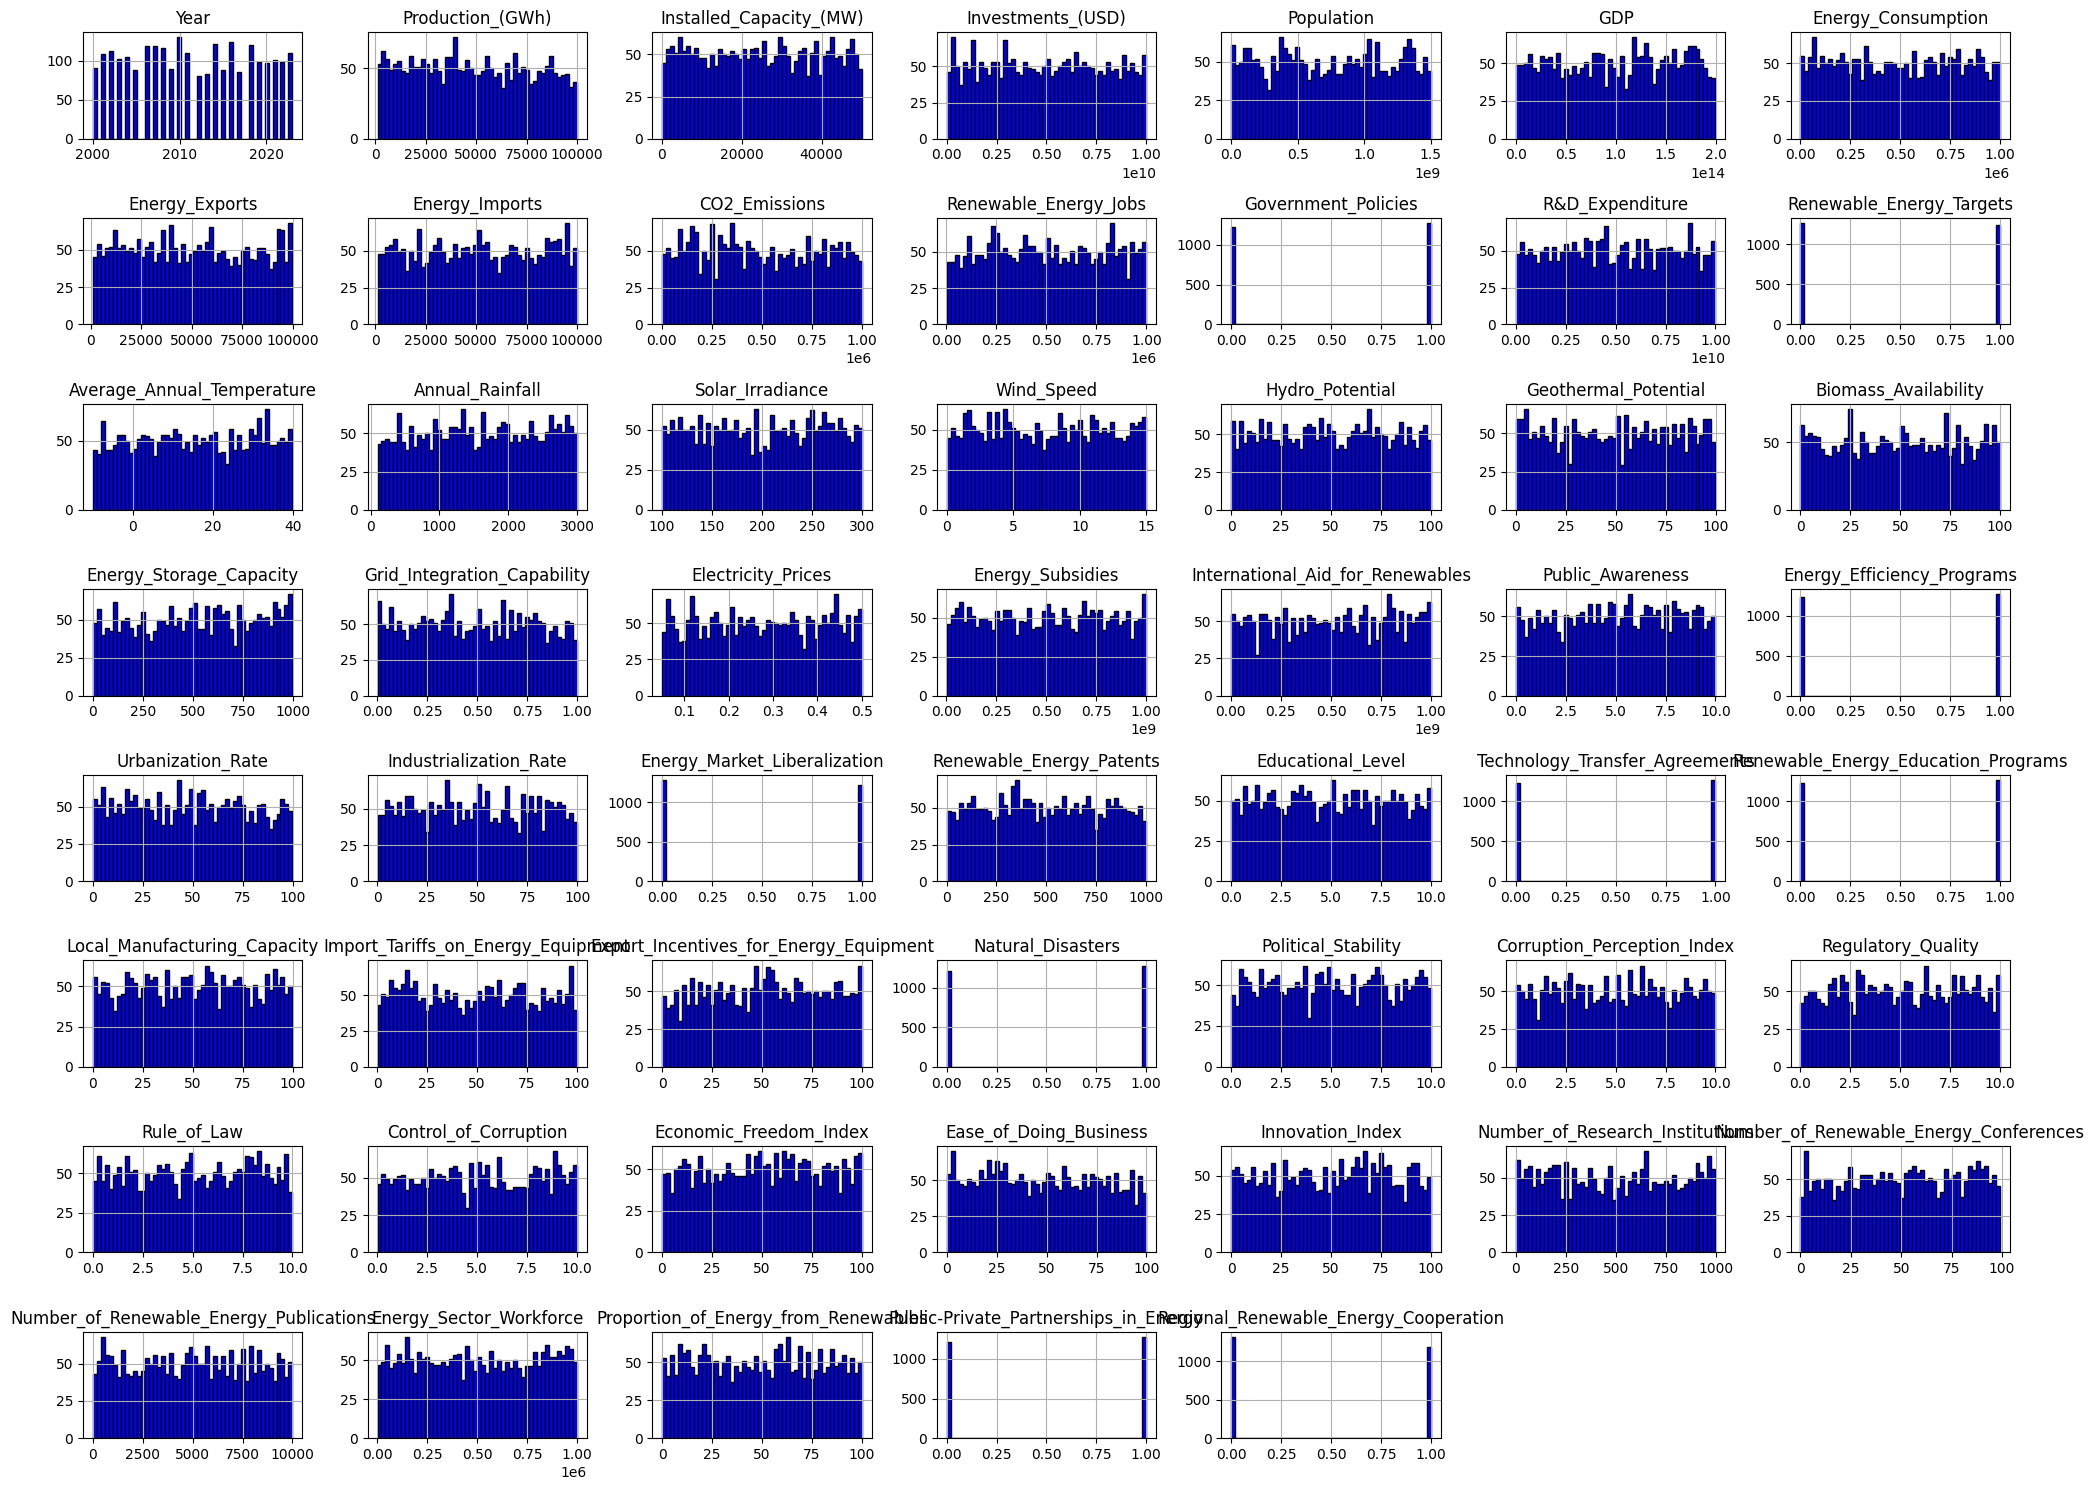

In [7]:
df.hist(figsize=(20, 15), bins=50, color='blue', edgecolor='black')
plt.tight_layout()
plt.show()

## Boxplot para a produção de energia por país

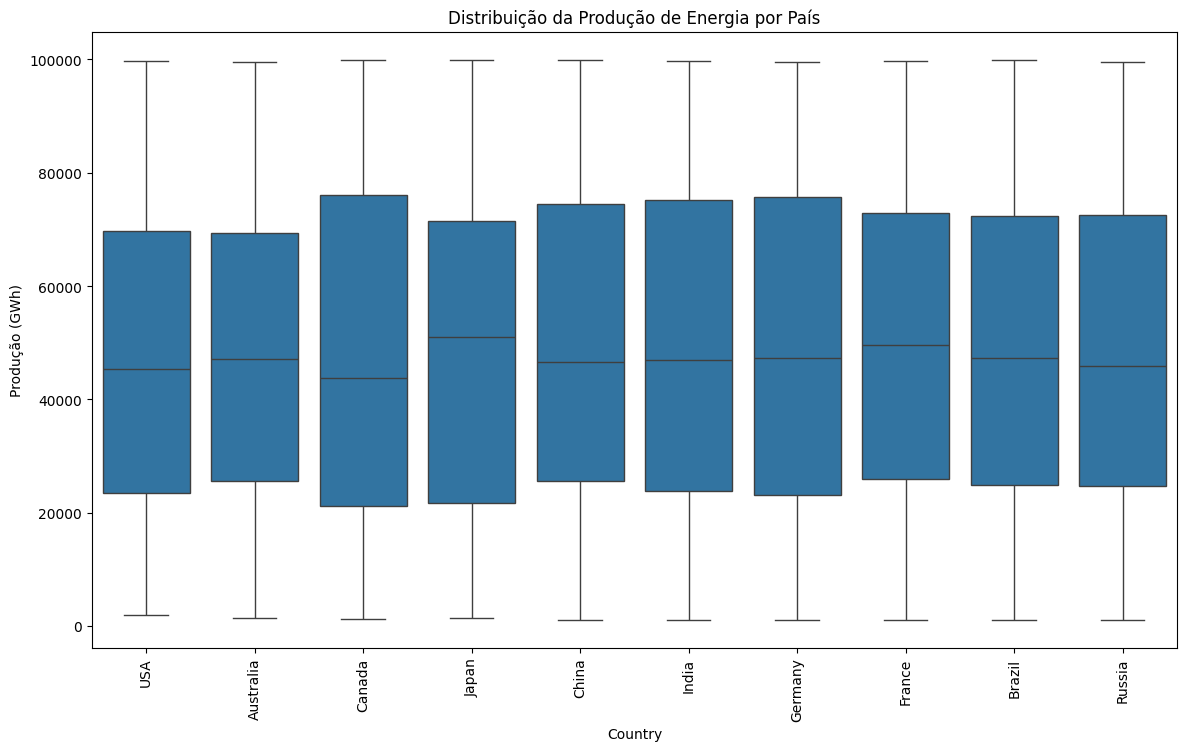

In [8]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='Country', y='Production_(GWh)')
plt.title('Distribuição da Produção de Energia por País')
plt.xticks(rotation=90)
plt.ylabel('Produção (GWh)')
plt.show()


## Previsão do investimento em energia renovável

### Variável Dependente
- **Investments (USD)**: Volume de investimentos em energia renovável, em dólares americanos.

### Variáveis Independentes
   
2. **Proportion of Energy from Renewables**: Essa coluna mostra a proporção ou porcentagem de energia consumida que provém de fontes renováveis, como solar, eólica, hidrelétrica, etc.
3. **Renewable Energy Jobs**: Número de empregos no setor de energia renovável, refletindo o desenvolvimento do setor.

4. **Energy Consumption**:  Refere-se ao consumo total de energia de uma região ou país, englobando todas as fontes de energia, renováveis ou não.

5. **Installed Capacity (MW)**:Essa coluna refere-se à capacidade instalada de geração de energia renovável, medida em Megawatts (MW).

6. **Production (GWh)**:Essa coluna refere-se à quantidade de energia renovável produzida em Gigawatt-hora (GWh).


### Objetivo
Modelar como fatores econômicos, políticas governamentais e o ambiente regulatório influenciam os investimentos em energias renováveis.


### Matriz de correlação
Visualizamos a correlação entre as variáveis usando um heatmap, o que nos ajuda a entender as relações entre as features e identificar possíveis multicolinearidades.

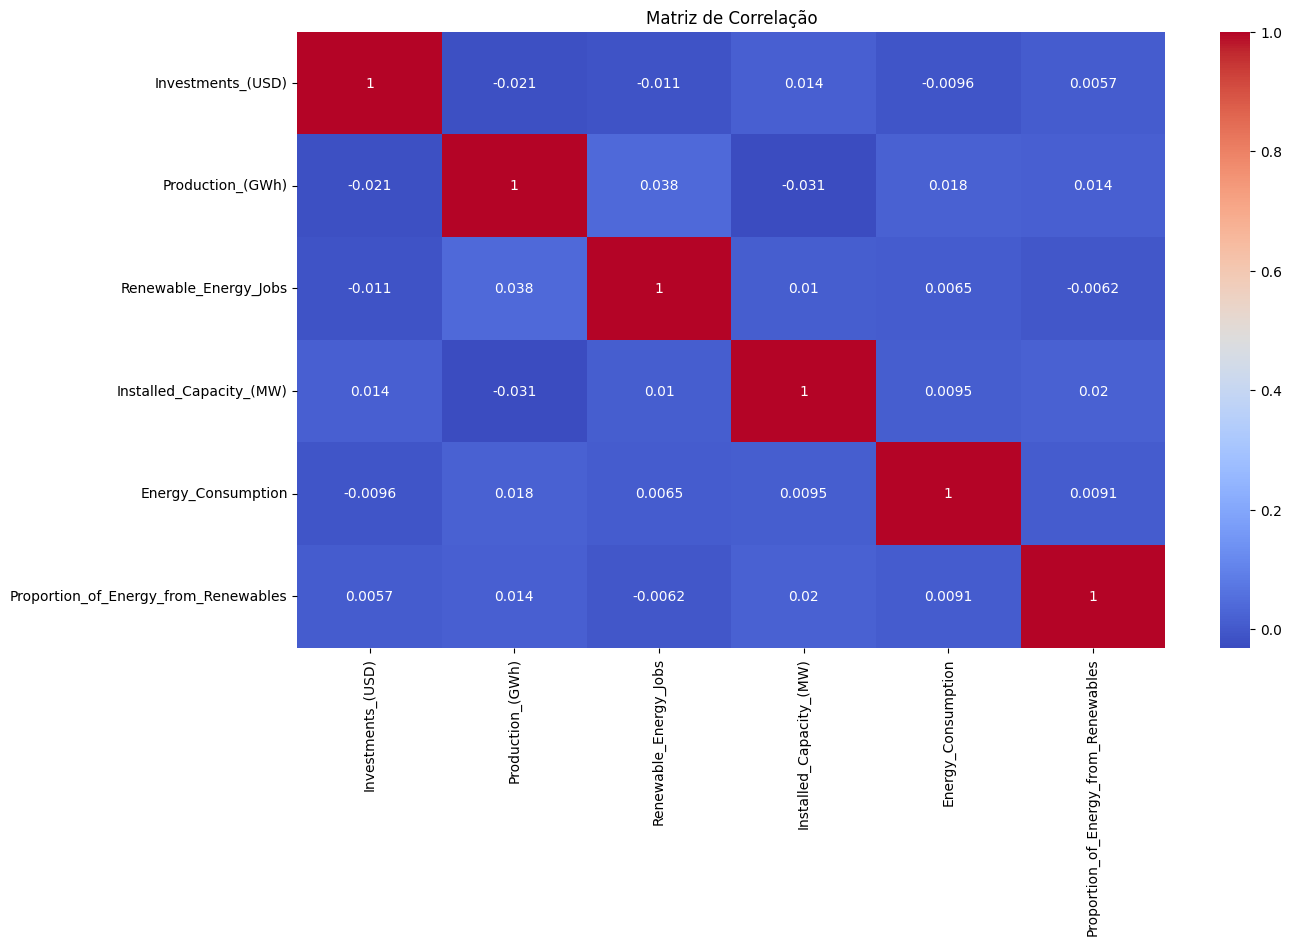

In [9]:
# Selecionar colunas para regressão
df_1 = df[['Investments_(USD)',  'Production_(GWh)', 'Renewable_Energy_Jobs', 'Installed_Capacity_(MW)', 'Energy_Consumption', 'Proportion_of_Energy_from_Renewables']]

# Plotar matriz de correlação
correlation = df_1.corr()
plt.figure(figsize=(14, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

### Separação dos dados em treino e teste
Separando o dataset em dados de treino e teste (80%/20%) para garantir que o modelo seja treinado em uma parte dos dados e avaliado em uma parte não vista anteriormente.

In [10]:
X = df_1.drop('Investments_(USD)', axis=1)
y = df_1['Investments_(USD)']

In [11]:
# Dividir dados em treino e teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizar os dados
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Adicionar ruído gaussiano aos dados
Criando uma função para adicionar ruído gaussiano aos dados de treino, o que pode ajudar a aumentar a robustez do modelo.

In [12]:
# Função para adicionar ruído gaussiano
def add_gaussian_noise(X, sigma=0.05):
    noise = np.random.normal(0, sigma, X.shape)
    return X + noise

# Adicionar ruído aos dados de treino
x_train_noisy = add_gaussian_noise(x_train_scaled, sigma=0.05)

# Combinar dados originais e com ruído
X_train_augmented = np.vstack((x_train_scaled, x_train_noisy))
y_train_augmented = np.hstack((y_train, y_train))  # Duplicar os rótulos

# Converter para tensores do TensorFlow
X_train_tensor_augmented = tf.convert_to_tensor(X_train_augmented, dtype=tf.float32)
y_train_tensor_augmented = tf.convert_to_tensor(y_train_augmented, dtype=tf.float32)

# Criar dataset aumentado
train_dataset_augmented = tf.data.Dataset.from_tensor_slices((X_train_tensor_augmented, y_train_tensor_augmented))
train_loader_augmented = train_dataset_augmented.batch(32).shuffle(buffer_size=1000)

# Verificar formato
X_train_augmented.shape, y_train_augmented.shape


((4000, 5), (4000,))

### Definir modelo de regressão
Definindo a arquitetura da rede neural para o problema de regressão, com múltiplas camadas densas,
usando a função `relu` como ativação e a função `mse` como loss

In [13]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

def train_regression_model(features, targets, epochs=100, batch_size=10):
    model = tf.keras.Sequential([
        layers.Dense(256, activation='relu', input_shape=(features.shape[1],)),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(1)  # Camada de saída para regressão
    ])

In [29]:
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Definir o modelo com Dropout e L2 Regularization
def train_regression_model_with_regularization(features, targets, epochs=100, batch_size=32):
    model = tf.keras.Sequential([
        layers.Dense(256, activation='relu', input_shape=(features.shape[1],),
                     kernel_regularizer=regularizers.l2(0.001)),  # L2 regularization
        layers.Dropout(0.3),  # Dropout de 30%
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dense(1)  # Camada de saída para regressão
    ])
    # Compilar o modelo
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    # Early stopping callback
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

      # Learning rate reduction callback
    lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6, verbose=1)

    # Treinar o modelo
    history = model.fit(features, targets, epochs=epochs, batch_size=batch_size, validation_split=0.2, callbacks=[early_stopping])

    return model, history

# Converter tensores para o treinamento
features_tensor = X_train_tensor_augmented
targets_tensor = y_train_tensor_augmented

# Treinar o modelo
model, history = train_regression_model_with_regularization(features_tensor, targets_tensor, epochs=100, batch_size=32)


Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 32635565597182132224.0000 - mae: 4913075200.0000 - val_loss: 32981608294722306048.0000 - val_mae: 4938651648.0000
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 32768210679957028864.0000 - mae: 4944099328.0000 - val_loss: 32981348809978150912.0000 - val_mae: 4938626048.0000
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 33195315971766616064.0000 - mae: 4977318912.0000 - val_loss: 32979967823373664256.0000 - val_mae: 4938485248.0000
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 31916836836337516544.0000 - mae: 4856406016.0000 - val_loss: 32975714912397426688.0000 - val_mae: 4938053632.0000
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 32243978928996220928.0000 - mae: 4896266752.0000 - val_loss: 32966285500677619712.0000 - val_mae: 4937096192.0000
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 32933440889332695040.0000 - mae: 4957467136.0000 - val_loss: 329

In [30]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 256)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 128,261 (501.02 KB)

 Trainable params: 42,753 (167.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 85,508 (334.02 KB)

#Feature Engeneering
Aplicandos técnicas de engenharia de features, como criar novas variáveis e aplicar transformações logarítmicas na variável alvo.

In [16]:
X = df_1.drop('Investments_(USD)', axis=1)
X['Capacity_to_Consumption'] = X['Installed_Capacity_(MW)'] / X['Energy_Consumption']
X['Production_and_Jobs'] = X['Production_(GWh)'] * X['Renewable_Energy_Jobs']

In [17]:
# Aplicar transformação logarítmica na variável alvo
y = np.log1p(df['Investments_(USD)'])

In [18]:
# Selecionar apenas as colunas numéricas de X
numeric_columns = X.select_dtypes(include=[np.number])

# Calcular o IQR para as colunas numéricas
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1

# Remover outliers das colunas numéricas
X_filtered = X[~((numeric_columns < (Q1 - 1.5 * IQR)) | (numeric_columns > (Q3 + 1.5 * IQR))).any(axis=1)]

# Filtrar o y correspondente a X_filtered
y_filtered = y[X_filtered.index]

### Seleção de features com RFE
Utilizando o algoritmo de Recursive Feature Elimination (RFE) com uma regressão linear
para selecionar as três features mais importantes

In [19]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Aplicar RFE para selecionar as melhores features
linear_reg = LinearRegression()
rfe = RFE(estimator=linear_reg, n_features_to_select=3)
rfe.fit(X_filtered, y_filtered)
X_selected = rfe.transform(X_filtered)

In [20]:
# Ver quais features foram selecionadas
selected_features = X_filtered.columns[rfe.support_]

print(f'Features selecionadas: {selected_features}')

Features selecionadas: Index(['Production_(GWh)', 'Proportion_of_Energy_from_Renewables',
       'Capacity_to_Consumption'],
      dtype='object')


### Filtrar apenas as features selecionadas
Com base na seleção de features, filtramos o dataset para manter apenas as mais relevantes

In [21]:
# Filtrar apenas as features selecionadas
X_selected = rfe.transform(X_filtered)

# Dividir dados em treino e teste
x_train, x_test, y_train, y_test = train_test_split(X_selected, y_filtered, test_size=0.2, random_state=42)

# Padronizar os dados
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [22]:
#Converter para tensores do TensorFlow
x_train_tensor = tf.convert_to_tensor(x_train_scaled, dtype=tf.float32)
x_test_tensor = tf.convert_to_tensor(x_test_scaled, dtype=tf.float32)
y_train_tensor = tf.convert_to_tensor(y_train.values, dtype=tf.float32)  # Converter para tensor, mantendo a ordem
y_test_tensor = tf.convert_to_tensor(y_test.values, dtype=tf.float32)

In [31]:
# Treinar o modelo FE
model, history = train_regression_model_with_regularization(x_train_tensor, y_train_tensor, epochs=100, batch_size=32)

Epoch 1/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 384.5196 - mae: 19.0932 - val_loss: 52.0334 - val_mae: 5.7466
Epoch 2/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 40.6544 - mae: 5.0431 - val_loss: 21.2030 - val_mae: 3.6797
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25.1663 - mae: 4.0771 - val_loss: 15.0351 - val_mae: 3.0868
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.3213 - mae: 3.4836 - val_loss: 10.3941 - val_mae: 2.5707
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.3800 - mae: 2.9468 - val_loss: 7.0763 - val_mae: 2.0979
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.9075 - mae: 2.6584 - val_loss: 5.1279 - val_mae: 1.7893
Epoch 7/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.5588 - mae: 2.2761 - val_loss: 3.4467 - val_mae: 1.4223
Epoch 8/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.7182 - mae: 2.0536 - val_loss: 2.6763 - val_mae: 1.1972
Epoch 9/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Tamanho de y_test_numpy: (432,)
Tamanho de y_pred_fe_numpy: (432,)


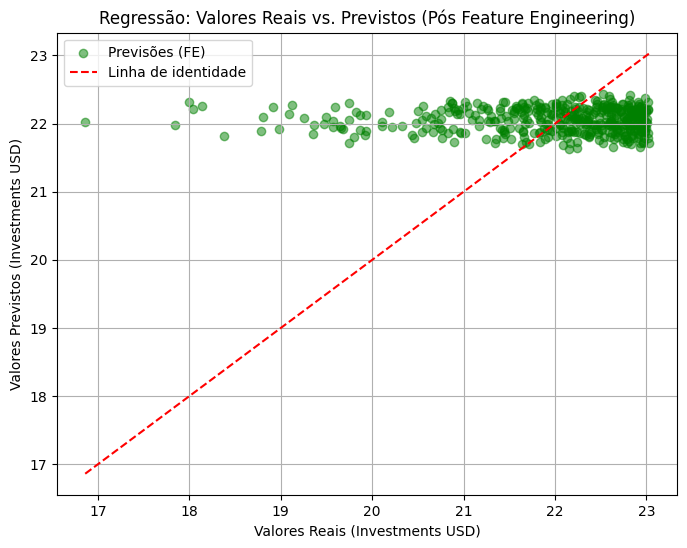

In [32]:
# Fazer previsões no conjunto de teste (após Feature Engineering)
y_pred_fe = model.predict(x_test_tensor)

# Converter y_test_tensor para NumPy para acessar min e max
y_test_numpy = y_test_tensor.numpy()
y_pred_fe_numpy = y_pred_fe.flatten()  # Certificar que y_pred_fe está em formato 1D

# Verificar os tamanhos
print(f"Tamanho de y_test_numpy: {y_test_numpy.shape}")
print(f"Tamanho de y_pred_fe_numpy: {y_pred_fe_numpy.shape}")

# Plotar valores reais vs. previstos (pós Feature Engineering)
plt.figure(figsize=(8, 6))
plt.scatter(y_test_numpy, y_pred_fe_numpy, alpha=0.5, color='green', label='Previsões (FE)')
plt.plot([y_test_numpy.min(), y_test_numpy.max()], [y_test_numpy.min(), y_test_numpy.max()], 'r--', label='Linha de identidade')
plt.xlabel('Valores Reais (Investments USD)')
plt.ylabel('Valores Previstos (Investments USD)')
plt.title('Regressão: Valores Reais vs. Previstos (Pós Feature Engineering)')
plt.legend()
plt.grid(True)
plt.show()

## Análise do Gráfico:
Distribuição dos Pontos:

- A maioria dos pontos está acima e à direita da linha de identidade, sugerindo que o modelo está superestimando os valores previstos em relação aos valores reais.

- Existem alguns pontos dispersos abaixo da linha de identidade, indicando que em alguns casos o modelo subestima os valores, mas esses são em menor quantidade.
Tendência de Superestimação:

- A aglomeração de pontos mais próximos da parte superior direita do gráfico indica que o modelo está consistentemente superestimando para um intervalo específico de valores reais (em torno de 22 a 23).
Faixa de Valores:

- O eixo Y (Valores Previstos) varia aproximadamente entre 17 e 23, enquanto o eixo X (Valores Reais) varia entre 17 e 23 também. Isso mostra que a faixa de previsão está semelhante à faixa de valores reais, mas ainda assim há uma tendência de erro.
- Ruído nas Previsões:
O fato de haver pontos dispersos longe da linha de identidade e em grande quantidade pode indicar ruído no modelo, ou seja, o modelo não está capturando bem a relação entre as variáveis de entrada e a variável alvo (Investments USD).

- Com a adição do learning rate adjustment os dados de previsão ficaram menos espaçados

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Fazer previsões no conjunto de teste
y_pred = model.predict(x_test_scaled)

# Calcular MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Calcular MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Calcular RMSE
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calcular R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R²): {r2}')


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step
Mean Absolute Error (MAE): 0.7913335147182474
Mean Squared Error (MSE): 1.1616807831853913
Root Mean Squared Error (RMSE): 1.0778129629881945
R-squared (R²): -0.04418462826433189
